In [22]:
#Importing neccessary libraries for Analysis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sas

import warnings
warnings.filterwarnings("ignore")

In [23]:
#Reading data
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [24]:
#Exploring data
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
#Checking for Dupliactes
rev_dup=data.duplicated()
print("No. of Duplicates:"+ str(rev_dup.sum))

No. of Duplicates:<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


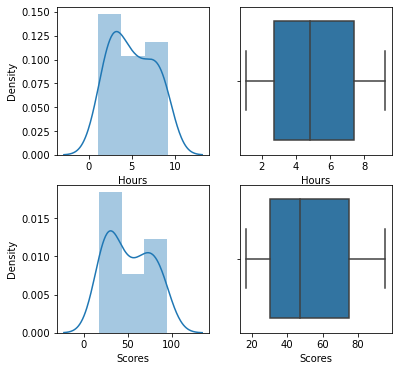

In [28]:
#Exploratory Data Analysis
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sas.distplot(data['Hours'], ax=axes[0][0])
a=sas.boxplot(data['Hours'], orient='v', ax=axes[0][1])

a=sas.distplot(data['Scores'], ax=axes[1][0])
a=sas.boxplot(data['Scores'], orient='v', ax=axes[1][1])

plt.show()

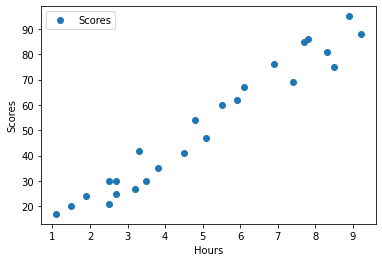

In [29]:
#Distribution of scores

data.plot(x='Hours', y='Scores', style='o')
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

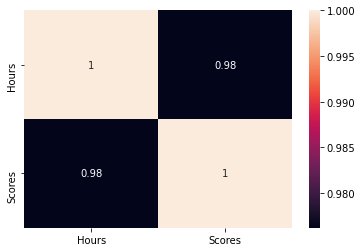

In [30]:
#Checking correlation

sas.heatmap(data.corr(),annot=True)

plt.show()

In [31]:
#Linear Regression

X = data.iloc[:, :-1].values
y = data.iloc[:, 1]. values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

#Training Linear Regression Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

print("Done with Traning")

Done with Traning


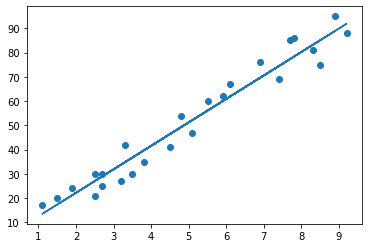

In [32]:
#Plotting the Regression Line

n=lr.coef_
c=lr.intercept_
line=n*X+c
plt.scatter(X,y)
plt.plot(X,line);

plt.show()

In [34]:
#Checking Accuracy

print('Training Score:', lr.score(X_train,y_train)*100)
print('Testing Score:', lr.score(X_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


In [35]:
#Predicting the Scores

ypred=lr.predict(X_test)
print('ypred:')
print(ypred)

ypred:
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [36]:
#Actual vs predicted comparison

ac_pred=pd.DataFrame({'Actual':y_test, 'Predicted':ypred})
ac_pred

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [48]:
#Predicting if she/he studies for 9.25 hours per day

hours= 9.25
ownpred=lr.predict([[hours]])
print("Predicted Score=" .format(ownpred[0]))
print(ownpred)

Predicted Score=
[92.38611528]


In [49]:
#Model Evaluation

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,ypred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272


In [ ]:
#Conclusion- The predicted score came out to be around 92 based on the number of study hours= 9.25 hours per day